<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Parcial 03 - IA**

## **Outline**

1. [Ejercicio 1. Clustering](#eje1)
2. [Ejercicio 2. Cost function](#eje2)
3. [Ejercicio 3. Crossover function](#eje3)
4. [Ejercicio 4. Mutation function](#eje4)

In [1]:
#@title 1. MONTAR EL DRIVE **student** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/ai-q03/')
print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

Mounted at /content/drive
/content/drive/My Drive/ai-q03


---
#### - Usted debe ejecutar **TODAS** las celdas de tipo **CODE**. De lo contrario, sus respuestas no serán procesadas correctamente.

#### - Para este notebook es recomendable usar la **GPU**. Por favor verifique que esté habilitada la GPU en `Editar -> Configuración del notebook -> Acelerador de hardware (Opción GPU)`
---

# **Ejercicio 1. Clustering**  <a name="eje1"></a>

Considere la siguiente imagen:

<Figure size 648x648 with 0 Axes>

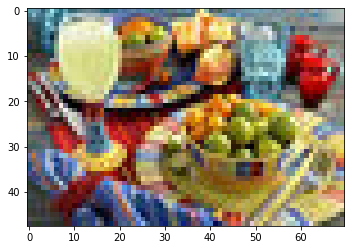

In [2]:
#@title **code** Load image to work
import matplotlib.pyplot as plt
from skimage import io

fig = plt.figure(figsize=(9,9))
img_1 = io.imread("imgs/q03p01.jpg")

plt.figure(figsize=(15,4))
plt.imshow(img_1);

Complete la función `clustering` de la siguiente forma:
- Use los valores $\{2, 4, 8\}$ para el parámetro `n_clusters` de la función `KMeans`
- Adicionalmente, utilice el parámetro `random_state` con un valor de $0$ en la función de `kmeans(...)`
- Utilice como caracteristicas los canales de color de la imagen. 
- Devuelva una lista `imgs` con las tres imágenes resultantes (Con resultado de clustering 2, 4,8)

In [77]:
#@title **2172969**
#@markdown No modifique las dos últimas lineas

def clustering():
  from sklearn.cluster import KMeans 
  from skimage import io
  import matplotlib.pyplot as plt
  import numpy as np

  img_1 = io.imread("imgs/q03p01.jpg")
  img_1 = np.array(img_1, dtype=np.float64)/255
  height,width = img_1.shape[0], img_1.shape[1]
  X = img_1.reshape(-3,3)

  nc = [2,4,8]
  imgs = []

  x = np.array([])
  y = np.array([])
    
  for i in range(height):
    for j in range(width):
      x = np.append(x,i)
      y = np.append(y,j)

  for i in nc:
    kmeans = KMeans(n_clusters=i,random_state = 0)
    kmeans.fit(X)
    imgs.append(kmeans.labels_.reshape(height,width))

  return imgs

import urllib.parse, inspect
src0 = urllib.parse.quote_plus(inspect.getsource(clustering))

<Figure size 648x648 with 0 Axes>

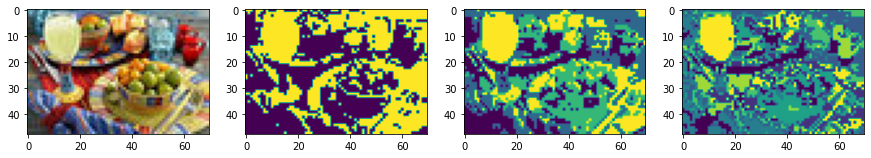

In [78]:
#@title **verifique su respuesta**
import matplotlib.pyplot as plt
from skimage import io

img_1 = io.imread("imgs/q03p01.jpg")
image = clustering()

fig = plt.figure(figsize=(9,9))
plt.figure(figsize=(15,4))
plt.subplot(141)
plt.imshow(img_1)
plt.subplot(142)
plt.imshow(image[0])
plt.subplot(143)
plt.imshow(image[1])
plt.subplot(144)
plt.imshow(image[2])

In [79]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS7_0 $src0

evaluation result CORRECT


# **Algoritmos Geneticos: Comunicación en una mesa redonda**


Un grupo de 300 personas de diferentes países se sienta en una mesa circular con 300 sillas. Cada persona sabe hablar dos idiomas (no necesariamente los mismos para todos). Los idiomas se codificarán de la siguiente manera:

*   0: Español
*   1: Inglés
*   2: Alemán
*   3: Francés
*   4: Portugués
*   5: Mandarín
*   6: Coreano
*   7: Noruego
*   8: Italiano
*   9: Persa
*   10: Árabe

Para este taller una mesa se codifica como un arreglo de 300 posiciones, y en cada posición (silla de la mesa) existe una lista de los dos posibles idiomas. Observe la siguiente ilustración.<br><br>

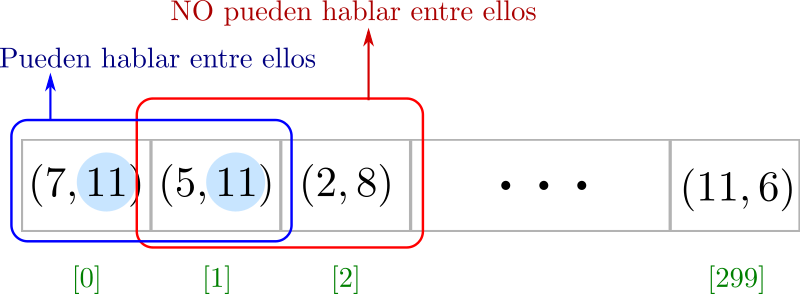

In [3]:
#@markdown -
from IPython.display import Image
Image(filename='imgs/mesaredonda01.png', width=800)

Vamos a generar una **_buena_** solución para que se encuentre una disposición de las personas en la mesa de manera que cada persona pueda comunicarse con sus dos vecinos en la mesa.

- Tenga en cuenta que cada persona debe hablar dos idiomas **diferentes**. Es decir, si $(x_i, x_j)$ es la dupla de idiomas hablados por la persona, se tiene que cumplir que: $\enspace$ $x_i \neq x_j$

Para los siguientes puntos, la mesa redonda se simulará con el siguiente arreglo, donde cada solución es una permutación de los indices de la mesa. 


solución 1: 
[185 127 154  74 271  64 174 282 216 124 158 299 220 207  14 117 287 226
 140 164 178  96  59  46 148 208 196  73  38 123 246 151  75 297 141  63
 280  10 180  44 254 172 284  83 205 173 108 146 195 221  28 175 295  19
 163  97 165 132 115  82   8   5  45 223 236 215 107  24  16  69  94  92
 134 179  51 259 225 227 189 168  58  55 137 159  47 122 245 155 143 188
 105  13 131  95  67 232 275 212  72  52 110 269 147 231 252 238  86 101
 283  76 242 135 157 234  98 112  18  77  54 116 200 193 289 241 198 276
   2 119 270 109 152 294 128  30 114 219 156 121 240  17  33 120  20 138
 145  99 167 239 230 288  81 279 149 191 126 273 291   3 217 222  88 204
 218 177 256  87  84  80  53 257 129  89 206 255 248 266  34 184  61 199
 176 243 277 203 130 258 201 278 111 285 224   9 102 144 235   7 133 228
 113 182 272 250 139 263 162  91 104 161 251  85  50 260  93   4 265  42
  29 106  23 268 181 233 209 281 267 169  37  26  41   1  11 100  60 160
 190 253 136 247 150  68 262 229 286 2

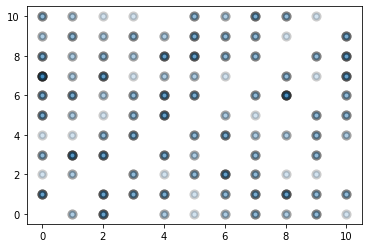

In [54]:
#@title **code** 
#@markdown Codificación de la mesa y dos posibles soluciones
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Generamos 300 personas con sus dos idiomas hablados
mesa_redonda = np.array([[0,7],[3,5],[0,1],[1,6],[1,7],[2,3],[2,4],[10,6],[6,1],[7,5],[5,3],[4,2],[1,5],[4,7],[8,4],[6,0],[10,8],[2,0],[6,10],[5,2],[8,6],[0,8],[7,9],[0,1],[8,1],[3,2],[6,5],[7,4],[9,0],[0,5],[0,7],[1,6],[6,9],[8,10],[2,9],[3,1],[4,1],[2,9],[1,6],[4,6],[10,8],[2,8],[5,9],[10,7],[3,4],[1,9],[10,7],[6,0],[3,10],[1,10],[2,3],[9,3],[0,4],[4,3],[1,0],[4,7],[1,9],[4,8],[0,5],[1,0],[10,4],[5,7],[6,4],[7,3],[2,7],[4,5],[3,4],[3,6],[0,7],[8,9],[0,1],[0,6],[7,9],[5,6],[1,2],[4,8],[4,5],[8,1],[6,1],[4,5],[2,7],[6,2],[6,8],[4,3],[0,1],[7,0],[9,8],[2,4],[6,4],[4,8],[5,2],[2,8],[8,7],[1,6],[5,4],[0,8],[4,3],[3,8],[4,1],[1,8],[0,3],[7,3],[6,2],[7,0],[0,9],[8,7],[7,8],[10,9],[9,8],[4,0],[0,6],[2,0],[1,3],[6,8],[8,2],[4,3],[3,9],[10,8],[5,8],[3,4],[0,7],[8,1],[7,2],[9,5],[7,6],[10,1],[9,1],[4,5],[7,8],[7,6],[9,7],[4,0],[0,8],[4,8],[0,10],[10,1],[9,8],[8,4],[6,9],[1,3],[0,7],[9,3],[9,4],[5,8],[0,7],[5,2],[4,6],[5,8],[4,6],[1,3],[7,1],[4,9],[2,5],[5,4],[2,1],[7,3],[2,0],[8,0],[2,7],[7,10],[9,5],[2,6],[9,3],[8,1],[6,4],[10,8],[8,6],[5,9],[10,1],[2,1],[5,3],[4,6],[7,2],[5,10],[0,1],[0,7],[6,8],[7,2],[2,4],[0,9],[5,9],[3,6],[7,9],[2,0],[2,10],[3,5],[0,5],[10,5],[2,8],[6,2],[4,8],[8,6],[2,7],[2,3],[9,5],[6,7],[1,3],[7,10],[7,6],[6,5],[7,10],[2,1],[0,6],[9,0],[4,1],[2,3],[10,6],[0,2],[1,3],[2,3],[2,1],[10,5],[7,1],[9,4],[1,10],[7,1],[10,9],[10,7],[6,10],[5,1],[5,10],[7,8],[9,2],[7,4],[4,9],[4,5],[8,6],[1,7],[1,2],[9,1],[6,1],[1,5],[3,7],[8,6],[9,1],[0,3],[5,8],[3,8],[7,1],[2,7],[9,10],[5,10],[9,0],[0,10],[1,3],[10,0],[5,6],[1,8],[8,0],[0,10],[5,4],[3,2],[6,9],[0,6],[8,7],[10,8],[3,1],[3,2],[8,6],[8,1],[5,9],[10,9],[0,5],[2,1],[5,6],[6,2],[10,4],[3,5],[0,7],[10,5],[7,10],[5,7],[6,4],[1,9],[2,0],[10,7],[8,10],[3,9],[0,8],[7,0],[4,1],[5,0],[3,1],[9,4],[0,3],[3,9],[8,6],[2,6],[3,1],[10,7],[8,10],[6,2],[10,9],[3,4],[5,8],[10,6],[3,6],[4,6],[5,6],[1,4]])
n_personas = len(mesa_redonda)

plt.scatter(mesa_redonda[:,0], mesa_redonda[:,1], s=50, alpha=0.2, edgecolors="black", linewidths=3)

solucion1 = np.random.permutation(n_personas)
solucion2 = np.random.permutation(n_personas)
print("solución 1: ")
print(solucion1)
print("solución 2: ")
print(solucion2)

# **Ejercicio 2. Cost function**  <a name="eje2"></a>

Complete la función de costo ````TSP_cost1```` para ponderar cada solución teniendo en cuenta el número de vecinos que pueden hablarse, de la siguiente manera:

- Si no es posible hablar el mismo idioma que ambos vecinos, la función de costo debe incrementar 100 unidades.
- De lo contrario, la función de costo debe incrementar solamente 1 unidad.
- Tenga en cuenta los índices que corresponden a la primera posición (índice 0) y a la última posición (índice 299) son considerados **VECINOS**.


**Recomendación:** para simplificar el problema, valide que CUALQUIERA de los dos idiomas hablados por la persona SIGUIENTE, sea el mismo que CUALQUIERA de los dos idiomas que habla la persona actual.



In [75]:
#@title **2172969**
#@markdown No modifique las dos últimas lineas

def TSP_cost1(personas, solution):
    costo = 0
    sol_personas = personas[solution]
    tuplas = np.roll(sol_personas,-1,axis = 0)
    for i in range(sol_personas.shape[0]):
      if tuplas[i][0] in sol_personas[i] or tuplas[i][1] in sol_personas[i]:
        costo+=1
      else:
        costo+=100
    return costo


import urllib.parse, inspect
src1 = urllib.parse.quote_plus(inspect.getsource(TSP_cost1))

In [76]:
#@title **verifique su respuesta**

import numpy as np
solution = np.random.permutation(300)
print(solution)

TSP_cost1(mesa_redonda, solution)

[232  17  79 118 181 184  15 256 235  29  96  36 162  27 114 230  87 269
 290 238 287 119 263 106  55 222  38  70  85 166   3 125 249 131 111 121
 168  23 122 143 173 213 139  39 282  89  45 138  26  59 155  41  22 160
 242 190 188  88 295 183 199 220 293 244 266  14 115 283  99  67 163 226
 189 169  66  13  20 170 221   5  46  58 108 229 241 279 278  31 104 197
 254 260 175 205   2  51  50 201 164 264  84 208  11 271 203 101 145  33
 270 105 167  34 200 142 153 130 152  63 276  62 284 212  90 265 247 259
  10  53  42   7 268 176 210  40  25  12 134 107 272 144 219 202 109  24
 198 137 253 297 217 277  28 211 150 103 196  94  72 191 262   4  82  37
  52  81 157 206 255 215  30 132 186 192  73 194  95 149 216  61  44 288
  35 154  19 141 146  65 275 140  92 280  69   8 161 258 296 231  77 133
 261 112 110 289  83 136 123 100 180 165 171  80 182  43 127 243 129  93
 214  86 236 267  91 299   6 218  32 135 281 151 292 174 291  75  74 227
 102 207  78 172 240  60 159 204  21 228 128 156  4

20298

In [74]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS7_1 $src1

evaluation result CORRECT


# **Ejercicio 3. Crossover function**  <a name="eje3"></a>

Ahora vamos a generar una función de crossover que obtenga **tres hijos** por cada **tres** soluciones que se ingresan, utilizando la configuración descrita en la figura: 

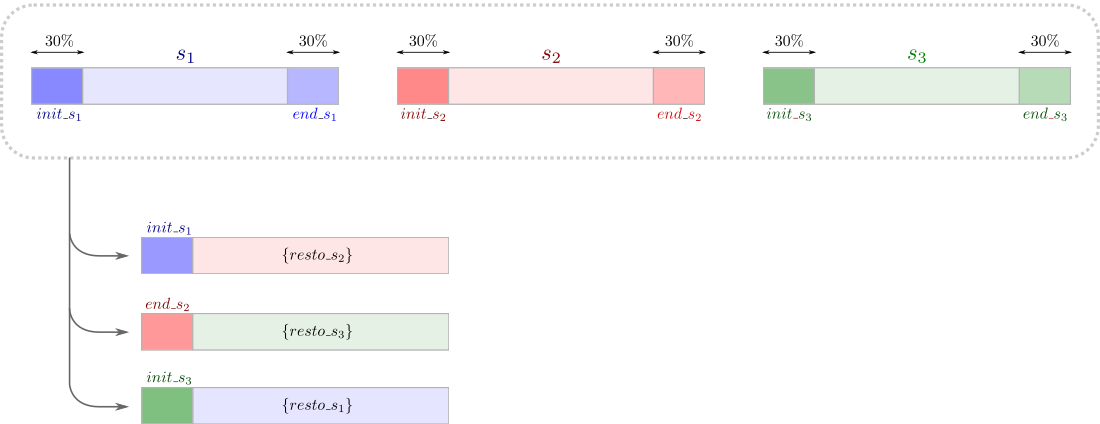

In [29]:
#@markdown -
from IPython.display import Image
Image(filename='imgs/mesaredonda03-quiz.png', width=900)

In [36]:
#@title **2172969**
#@markdown No modifique las dos últimas lineas

def TSP_cross_over_1(solution1, solution2, solution3):
    l = len(solution1)
    fp = int(l*0.3)
    stard1 = solution1[:fp]
    end2 = solution2[-fp:]
    stard3 = solution3[:fp]
    r = np.zeros((3,l))
    r[0,:fp] = stard1
    r[1,:fp] = end2
    r[2,:fp] = stard3
    c = fp
    for i in range(l):
      if not solution2[i] in stard1:
        r[0][c]=solution2[i]
        c += 1
    c = fp
    for i in range(l):
      if not solution3[i] in end2:
        r[1][c]=solution3[i]
        c += 1
    c = fp
    for i in range(l):
      if not solution1[i] in stard3:
        r[2][c]=solution1[i]
        c += 1

    return r[0], r[1], r[2]

#Colaboratory
import urllib.parse, inspect
src2 = urllib.parse.quote_plus(inspect.getsource(TSP_cross_over_1))

In [37]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS7_2 $src2

(array([ 2., 11.,  0.,  8.,  7., 16., 18., 13., 15.,  3., 14.,  1.,  5.,
        4., 10.,  6., 12., 17.,  9., 19.]), array([12., 17.,  9., 19.,  8.,  0., 10., 15., 13.,  1.,  2., 11.,  6.,
       14.,  7., 18.,  5.,  3.,  4., 16.]), array([10., 12.,  9., 15.,  0., 13.,  2., 11.,  8.,  7., 16., 18.,  6.,
       19., 14.,  4.,  5.,  1.,  3., 17.]))
(array([ 2., 11.,  0.,  8.,  7., 16., 18., 13., 15.,  3., 14.,  1.,  5.,
        4., 10.,  6., 12., 17.,  9., 19.]), array([12., 17.,  9., 19.,  8.,  0., 10., 15., 13.,  1.,  2., 11.,  6.,
       14.,  7., 18.,  5.,  3.,  4., 16.]), array([10., 12.,  9., 15.,  0., 13.,  2., 11.,  8.,  7., 16., 18.,  6.,
       19., 14.,  4.,  5.,  1.,  3., 17.]))
evaluation result CORRECT


# **Ejercicio 4. Mutation function**  <a name="eje4"></a>


Vamos a generar una función de mutación que realice lo siguiente:
1. Seleccione una posición aleatoria $\space$ $r$ $\space$ en la solución
2. Obtenga el PRIMER idioma que habla la persona ubicada en esa posición  $r$, es decir: $\space$ `mesa[solution[r]][0]`

<br><br>

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/talleres20202/misc/mesaredonda-quiz04a.png" />

<br><br>

3. Haga un recorrido desde la primera posición de la solución, buscando que el PRIMER idioma que hable cada persona, sea el MISMO idioma que habla la persona en la posición $r$ <br>

Durante dicho recorrido, recuerde **OMITIR** a la posición $r$
<br><br><br>

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/talleres20202/misc/mesaredonda-quiz04b.png" />

<br><br>

4. Tan pronto encuentre un idioma asociado al valor de la posición $i$ que cumpla con la condición (3), intercámbielo con el valor de la posición $r+1$. Con esto buscamos que las mutaciones siempre generen **un par de vecinos** que puedan hablar entre sí.<br>
Este intercambio debe realizarse **una sola vez** y debe devolverse la solución mutada hasta ese punto.

**Nota:** recuerde que la última posición de la mesa `[299]` se considera vecina de la primera posición de la mesa `[0]`. **Tenga en cuenta esta excepción** al momento de realizar el intercambio del paso (4).

<br><br><br>

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/talleres20202/misc/mesaredonda-quiz04c.png" />

<br><br><br>


In [147]:
#@title **2172969**
#@markdown No modifique las dos últimas lineas

def TSP_mutate1(solution, mesa, mutation_prob):
    import random
    import numpy as np
    np.random.seed(23)
    random.seed(23)

    mutated_solution = np.copy(solution)
    r = random.randrange(20)
    idioma1 = mesa[solution[r]][0]
    #print(r)
    temp = 0
    if r == 19:
      r1 = 0
    r1=r+1
    for i in range(len(solution)):
        if np.random.random()<mutation_prob:
            if r==i: continue #Ignore la posicion actual
        if mutated_solution[i] == idioma1:
          temp = mutated_solution[i]
          mutated_solution[i] = mutated_solution[r1]
          mutated_solution[r1] = temp
        return mutated_solution

#Colaboratory
import urllib.parse, inspect
src3 = urllib.parse.quote_plus(inspect.getsource(TSP_mutate1))

In [144]:
#@title **verifique su respuesta**
import numpy as np

%run mesa2.py

solution = np.random.permutation(20)
TSP_mutate1(solution, mesa2, 0.2)

9


array([12,  8,  9, 11,  4,  1, 13,  7,  5, 10, 18,  6, 17,  3, 16, 15, 14,
       19,  2,  0])

In [145]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS7_3 $src3

9
9
[ 1 14  4 16  5 19 18 17  9  6  8  0  3 13 12 10  2  7 15 11]
[ 1 14  4 16  5 19 18 17  9  6  8  0  3 13 12 10  2  7 15 11]
evaluation result CORRECT


Finalmente, observe el funcionamiento del algoritmo genético:


Orden de los indices [275  42 209 292  37 264   1  11  60 136  68 272  71 202 142 271  32   6
   0  56 194  25 186 211 103  65 187  48  21 192 175 230  40 127   2  18
 193  64 200  45 282 164 250 145 152  63  14 248 295 107  83  43 227  77
 286 232 137 298  82 190  73  92 196  38  44 185 238 115 229  74  46 257
 151  59 280  90 184 177 291  10 191 226  28 123 188  97 105 167 119 212
 234  72  52 297 243 153 254 201  86 101 134  76 146  98  54 156 178 109
 225 128  30 261 260 120 158 157 253  81 207 126  49 239 159 195  84  80
  53 267 228  34  61 176 233 288 224 130 268 296 246   7 133 198 206 216
  62 161  50 270  93   4 173 213 139  39  89 138  26 155  41  22 160 242
  88 183 199 220 293 244 266 283  99  67 163 189 169  66  13  20 170 221
  75  94 165 285 141 179  19 222 131  95   8   5 245 147 237 132 122  24
  16  69 110 204 143 281 172  51 154 284 265 205  17  79 118 181  15 256
 235  29  96  36 162  27 114  87 269 290 287 263 106  55  70  85 166   3
 125 249 111 121 168  23  58 

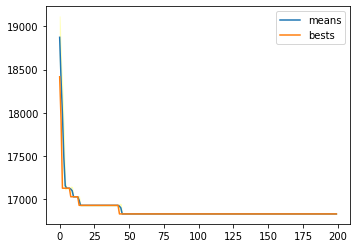

In [148]:
#@title **verifique su respuesta**
import numpy as np

def TSP_initialize_population1(n_individuals, n_personas):
    r = []
    for i in range(n_individuals):
        r.append(np.random.permutation(n_personas))
    return np.array(r)

def TSP_plot_GA_result(best, bests, means, stds):
    fig = plt.figure(figsize=(12,4))
    fig.add_subplot(121)
    plot_evolution(bests, means, stds)


%run ga5.py

r = run_ga(pop_size=10, 
               init_population_function = lambda x: TSP_initialize_population1(x, n_personas), 
               mutation_function        = TSP_mutate1, 
               crossover_function       = TSP_cross_over_1,
               cost_function            = lambda x: TSP_cost1(mesa_redonda, x), 
               crossover_prob           = 0.001,
               mutation_prob            = 0.001, 
               n_iters                  = 200,
               mesa = mesa_redonda)

best, best_costs, means, stds = r
TSP_plot_GA_result(best, best_costs, means, stds)
print("Orden de los indices", best)
print("Secuencia en la que se deben sentar las personas \n", mesa_redonda[best].tolist())

# **Pasos Finales.**



#### 1. Reemplace la variable con su código de estudiante

In [ ]:
#@title **1. Complete la siguiente información:**
taller_name = "quiz03" #@param {type:"string"}
codigo_name = "q03_2172969" #@param {type:"string"}


import urllib.parse, inspect
taller = urllib.parse.quote_plus(taller_name)
codigo = urllib.parse.quote_plus(codigo_name)

print(taller, codigo)

quiz03 q03_12345


In [ ]:
#@title **2. Guarde los cambios del taller**
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

In [ ]:
#@title **3. Ejecute la siguiente celda y envíe el archivo**
!./convert_ipynb.sh $codigo $taller

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>